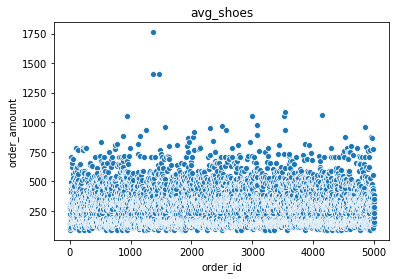

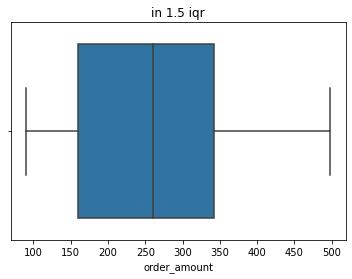

# Average Order Value: A Choice of Metrics
What metric and value would you report for this shoe store dataset?



# Example Metrics:

- **mean** of All Data   =  $3145.128 

- **median** of All Data =  $284.0 

- **mode** of All Data   =  $153.0 





## Full Question:

Look at orders data over a 30 day window. Out of 100 sneaker shops, where each shop sells one model of shoe, we want analysis of the average order value (AOV). 

Initially we calculated an AOV of $3145.13. Given shops are selling **affordable** sneakers, something seems wrong with our analysis.
What could be going wrong with our calculation? 

Find a better way to evaluate this data. 
What **metric** would you report for this dataset?
What is the value of this metric?

Provide your thought process & work.

(See Original Assignment Here)
https://docs.google.com/document/d/13VCtoyto9X1PZ74nPI4ZEDdb8hF8LAlcmLH1ZTHxKxE/edit?usp=sharing

# Answer (Summary):
AOV = Median of 1.5 IQR (Interquartile Range) of order_amount = $260.00


## Thought Process & Work (Summary): $260 is 7.2%

After using the standard statistical method 1.5_IQR (repeatable, and replicable, explained below) to remove 'outliers,' the resulting set of sales data looks much more promising than a raw mean for the following reasons. Within 1.5_IQR the mean and median differ only by .96, and the data still cover 99.3% of customers, 98% of shops, and 87.3% of orders. This is important because the more normally distributed and less skewed the data are, then the more compatible that data is with meaningful statistical analysis, and a normal distribution should include most of the data (also explained below).

For example, taking the median of the raw data (284) would be close to $260, but with the median and mean so far apart the data are very skewed. The overall median is likely much better than the overall mean but still of unknown reliability, and with no clarity of perception into what portion of the data that numbers describes (What good is a number, if you don't know what it refers to or how accurate it is, or how sound the data are, only knowing it comes from a very skewed distribution?). Additionally, on the chance that margins are thin for this segment of businesses, 284 USD and 260 USD may not be considered close at all.

The 1.5_IQR median on the other hand is much more clear. With a nearly identical mean and median in the 1.5_IQR data (still covering over 98% of shops and customers), we can be much more confident that the 1.5_IQR AOV number robustly describes an 'average' order, and we know much more about what specifically that number refers to within the data-set.



Sample Report Summary:

- mean using 1.5 IQR from all data     =  260.9594
- median using 1.5 IQR from all data   =  260.0
- mode using 1.5 IQR from all data     =  153.0

- % of unique_order_id    =  87.2625474905019
- % of unique_shop_id     =  98.01980198019803
- % of unique customer id =  99.33774834437085

**BUT** 

The isolation of this more normally distributed average customer, while looking indeed like the average shopper/order, represents a portion of customers that generated only 7.2% of sale dollars and 17% of items sold. This portion of orders may be your 'average customer & order placed' but it is not your average dollar earned or your average item-sold.

- % of sales              =  7.2404002644342045
- % of_all_items_sold     =  17.56418426802622

See below for a more complete analysis of how and why 1.5_IQR was chosen and an analysis of three likely categories of customers and shops, including one shop with one customer who make up %76.1 of sales revenue and %77.4 of sales volume.

Recommended actions based on this analysis:

- Keep your one big customer by any means (hire specialists to focus on and attend to them), and get more similar big customers if possible. Losing that one customer could sink your whole business.

- Find out what the other 'mystery' high-price customers are buying. Maybe have separate advertising and outreach for them.

- Try to increase the number of 'average' customers. They are probably the most stable and reliable part of your business, but they represent such a small % of your income (so small that they may be within a rounding error of the other customer groups in a given year). Some business strategies would recommend ditching these customers to focus on high-paying customers, but I think that is a high-risk strategy and ethically dubious in a broader perspective of your business' 'stakeholders.'



The aim here has been to provide analysis that is 1. statistically meaningful, 2. repeatable (given the same data and equations/notebook), 3. reproducible (across different analysts, not based on any arbitrary or intuitive decisions), 4. understandable, and 5. actionable. 

# Shoe Store Monthly AOV Analysis (Full Report)
# AOV = Average Order Value

Data as a Spreadsheet (e.g. for visual Inspection or download)

https://docs.google.com/spreadsheets/d/11NA0P2UWnYczeyrLId-WcngUs2cKIQ6iYRllVb2s-8w/edit?usp=sharing


## Packages and Libraries

In [278]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

## Functions for Analysis

In [279]:
# Function to display Summary Statistics

# # example input
# data = iqr_not2k
# blurb = "using 1.5 IQR from all data"

def sumary_statistics(data, blurb):
    print("Summary Statistics Report for ", blurb, "\n")
    # Total sales for this group
    iqr_sum = np.sum(data)
    print(f"sum {blurb}      = ", iqr_sum)

    # Range
    range = data.max() - data.min()
    print(f"range {blurb}    = ", range)

    # Variance
    variance = np.var(data)
    print(f"variance {blurb} = ", variance)

    # Standard Deviation
    standard_deviation = np.std(data)
    print(f"stnd dev {blurb} = ", standard_deviation)

    # Mean
    mean = np.mean(data)
    print(f"mean {blurb}     = ", mean)

    # Median
    median = np.median(data)
    print(f"median {blurb}   = ", median)

    # Mode
    mode = stats.mode(data)[0]
    print(f"mode {blurb}     = ", mode[0])

In [280]:
# Function for returning percentages

#order_id	shop_id	user_id	order_amount	total_items	payment_method


def report_percentages(blurb, dataset):

    print(f"\n\nPrecentage Report for {blurb}")

    print("\nDataset Shape = ", dataset.shape)

    # % of sales
    sales_percent = np.sum(dataset["order_amount"])/np.sum(df["order_amount"]) * 100
    print(f"\n% of sales              = ", sales_percent)

    percent_of_unique_order_id = len(dataset["order_id"].unique())/len(df["order_id"].unique()) * 100
    print(f"\n% of unique_order_id    = ", percent_of_unique_order_id)

    percent_of_unique_shops = len(dataset["shop_id"].unique())/len(df["shop_id"].unique()) * 100
    print(f"\n% of unique_shop_id     = ", percent_of_unique_shops)

    percent_of_unique_customers = len(dataset["user_id"].unique())/len(df["user_id"].unique()) * 100
    print(f"\n% of unique customer id = ", percent_of_unique_customers)

    #items sold
    all_items_sold = df["total_items"].sum()
    portion_items_sold = dataset["total_items"].sum()
    percent_of_all_items_sold = portion_items_sold / all_items_sold * 100
    print(f"\n% of_all_items_sold     = ", percent_of_all_items_sold)

    # average number of items purchased:
    avg_num_items_in_order = np.mean(dataset["total_items"])
    print(f"\navg number items/order   = ", avg_num_items_in_order)

    if len(dataset["payment_method"].value_counts()) == 3:

        # debit & credit
        not_cash = dataset["payment_method"].value_counts()[0] + dataset["payment_method"].value_counts()[1]
        # cash
        cash = dataset["payment_method"].value_counts()[2]
        # dataset_total
        dataset_total = len(dataset["payment_method"])

        # all debit & credit
        all_not_cash = df["payment_method"].value_counts()[0] + df["payment_method"].value_counts()[1]
        # all cash
        all_cash = df["payment_method"].value_counts()[2]
        # all total
        all_total = len(df["payment_method"])

        precent_is_cash = cash / dataset_total * 100
        print(f"\nprecent_is_cash         = ", precent_is_cash)

        precent_is_not_cash = not_cash / dataset_total * 100
        print(f"\nprecent_is_not_cash     = ", precent_is_not_cash)
        
        precent_of_all_cash = cash / all_cash * 100
        print(f"\nprecent_of_all_cash     = ", precent_of_all_cash)
        
        precent_of_all_not_cash = not_cash / all_not_cash * 100
        print(f"\nprecent_of_all_not_cash = ", precent_of_all_not_cash)

    else:
         print("\nonly existing forms of payment include: \n")
         print(dataset["payment_method"].value_counts())

# Call with this:    
# report_percentages(blurb, dataset)

### Loading in Data




.csv Data available here: If you want to recreate your own analysis, download and put in main colab directory
https://drive.google.com/file/d/10hHoal38BniZqhm2I683CXsODMe3hZvH/view?usp=sharing


In [281]:
# importing the data file into a pandas data-frame
df = pd.read_csv("c1.csv")

In [282]:
df.shape

(5001, 7)

### First Basic Inspections
Looking for:
- missing values
- shape
- descriptive statistics
- value counts
- overt features (e.g. skew)

In [283]:
df.shape

(5001, 7)

In [284]:
# check for missing values
df.isna().sum()

order_id          1
shop_id           1
user_id           1
order_amount      0
total_items       1
payment_method    1
created_at        1
dtype: int64

In [285]:
# check for missing values
# This is the most important column; nothing missing here.
df["order_amount"].isna().sum()

0

In [286]:
# examining data
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1.0,53.0,746.0,224.0,2.0,cash,2017-03-13 12:36:56
1,2.0,92.0,925.0,90.0,1.0,cash,2017-03-03 17:38:52
2,3.0,44.0,861.0,144.0,1.0,cash,2017-03-14 4:23:56
3,4.0,18.0,935.0,156.0,1.0,credit_card,2017-03-26 12:43:37
4,5.0,18.0,883.0,156.0,1.0,credit_card,2017-03-01 4:35:11


## Descriptive Statistics

A main anchor of this analysis will be descriptive statistics, which can tell you a lot about your dataset. 

In addition to the standard descriptive statistics of central tendency and spread, in this case we are also looking for information about relative percentages and sum totals (for which purpose functions have been made) to be able to more fully understand the whole story that these data tell. Why percentages? I want to know exactly how much of what story parts of the data apply to. If we remove an outlier (explain below), how much did that outlier contribute to various parts of the story (overall sales, stores, customers, kids of products, etc.)? We can easily see this story-information by looking at the percentages. 

Standard Descriptive Statistics:

	central tendency
		- mean
		- median (avoids outliers)
		- mode

	spread
		- range (max - min)
		- variance (mean of sum of each deviation^2)
		- standard deviation (square root of variance)


Reports generated for this analysis:

Summary Statistics Report 
- sum       
- range    
- variance 
- stnd dev  
- mean     
- median    
- mode      

Precentage Report 
- Dataset Shape 
- % of sales            
- % of unique_order_id   
- % of unique_shop_id    
- % of unique customer id 
- % of_all_items_sold   
- avg number items/order 
- precent_is_cash         
- precent_is_not_cash     
- precent_of_all_cash     
- precent_of_all_not_cash 

And the pre-made "describe" function is also used, as you can see in the square below. The three percent items are "quartiles" which will be explained later.

# First Analysis of Raw Data

In [287]:
# pandas descriptive statistics
df["order_amount"].describe()

count      5001.000000
mean       3145.128000
std       41278.410888
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

In [288]:
# Setting a Variable for Total Sales Dollar Amount
all_sum = df["order_amount"].sum()

In [289]:
# Summary Statistics v3

# inputs
data = df["order_amount"]
dataset = df
blurb = "All Data"

# Reports
sumary_statistics(data, blurb)
report_percentages(blurb, dataset)

Summary Statistics Report for  All Data 

sum All Data      =  15728785.128
range All Data    =  703910.0
variance All Data =  1703566492.1747937
stnd dev All Data =  41274.28366640412
mean All Data     =  3145.128
median All Data   =  284.0
mode All Data     =  153.0


Precentage Report for All Data

Dataset Shape =  (5001, 7)

% of sales              =  100.0

% of unique_order_id    =  100.0

% of unique_shop_id     =  100.0

% of unique customer id =  100.0

% of_all_items_sold     =  100.0

avg number items/order   =  8.7872

precent_is_cash         =  31.87362527494501

precent_is_not_cash     =  68.10637872425515

precent_of_all_cash     =  100.0

precent_of_all_not_cash =  100.0


## Basic Visual Examination of Order Value (Dollar Amount): by order_id, user_id, & shop_id 

---


Note: The horizontal bar at the very bottom (which may be displayed as lighter in color on some screens) is a solid row of dots, many layers thick.

## Order ID

Text(0.5, 1.0, 'All Raw Data')

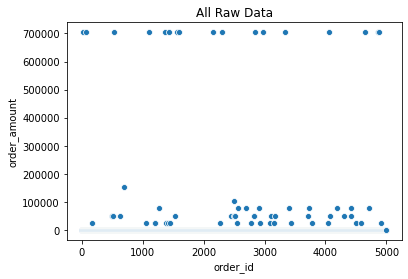

In [290]:
# by unique order number
sns.scatterplot(df["order_id"], df["order_amount"]).set_title('All Raw Data')

## User ID

Text(0.5, 1.0, 'All Raw Data')

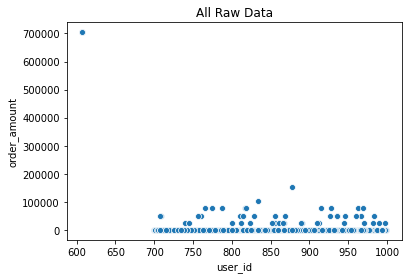

In [291]:
# user id
sns.scatterplot(df["user_id"], df["order_amount"]).set_title('All Raw Data')

# Shop ID
Note: Because in this case each shop sells only one product with one price, the shop view obscures how many times an idential order was made. (e.g. just one dot for the 2k_items shop/customer).

Text(0.5, 1.0, 'All Raw Data')

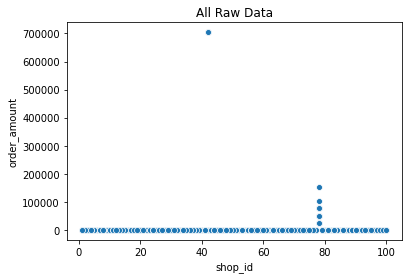

In [292]:
# by shop id
sns.scatterplot(df["shop_id"], df["order_amount"]).set_title('All Raw Data')

### Box and Whisker Plot: Notice, due to the scale of the 'outliers' or combined catagories of customers operating on different scales, the "box" of the box plot is not even visible in the noise.

Text(0.5, 1.0, 'All Raw Data')

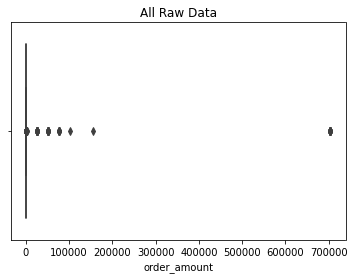

In [293]:
sns.boxplot(x=df["order_amount"]).set_title('All Raw Data')

## Histogram
In a sense this shows us the opposite of the box plot. In the box plot the lower numbers were invisible, and here in the histogram the upper numbers are invisible. Let's investigate this story fully. 

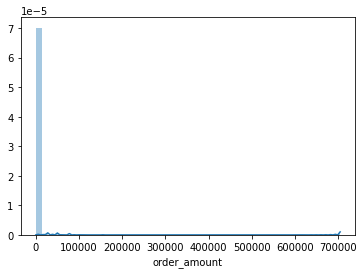

In [294]:
sns.distplot(df["order_amount"])

# As you can see, with the exception of the 2k-item customer, people purchase between 1 and 8 products.

In [295]:
print("How Many:\n")
print("Items   Orders\n")
print(df["total_items"].value_counts())

How Many:

Items   Orders

2.0       1832
1.0       1830
3.0        941
4.0        293
5.0         77
2000.0      17
6.0          9
8.0          1
Name: total_items, dtype: int64


## Inspecting "mode" type numbers (how many times the same purchase amount shows up)

In [296]:
df["order_amount"].value_counts()

153.0     87
306.0     85
354.0     82
156.0     75
160.0     75
          ..
920.0      1
650.0      1
774.0      1
1064.0     1
890.0      1
Name: order_amount, Length: 259, dtype: int64

## Since the overall topic is critiqueing a naive raw mean AOV (Average Order Value), here we can specify exactly what that is. The 'naive' AOV is the mean of all sales.

In [297]:
# note:
# raw AOV Average Order Value
# The mean of the order_amount column is the raw AOV
print("mean or naive AOV Average Order Value = ", np.mean(data))

mean or naive AOV Average Order Value =  3145.128


##Commentary on Initial Patterns

Just from looking at the median and a box and whisker plot, you can see that there are possibly 3 catagories of customers with likely different buying habbits. 

We are not just seeing a few fuzzy scales of data in a continuum. There are a clear and unique catagories of customer: The largest scale of customer always purchases exactly 2000 items at a time (paying, from what we can see so far, at least a similar price). For example one type of customer maybe instutional wholesale vs. retail consumer.

The first step will be to separate out that one 2k-item-purchasing customer group to do our first focused analysis into understanding who the customers for this shops are. 

##Commentary on Initial Descriptive Statistics

We can see both visually and numerically-quantitatively that these data are strongly "postively" or "right" skewed. We can see that the majority of data in the box plot are far to the left and that a few 'outlier' points are far to the right. More quantitatively we can see that the values of the mean and median and mode...

- mean All Data     =  3145.128
- median All Data   =  284.0
- mode All Data     =  153.0

...are far from being the same. A consequence of this is that our data are very not-normally-distributed and so will it not be easy (or possible) to perform traditional 'rigorous' statistical analysis on the dataset as it is. 

https://en.wikipedia.org/wiki/Skewness

# Outliers

What are they? Why they are important?

Let's look at a similifed (but still valid) example. 

In [298]:
pet_rock = [1,2,3,1,4,2,1,2,1000]

pet_rock = np.array(pet_rock)

pet_rock = pd.DataFrame(pet_rock)

# Mean
mean = np.mean(pet_rock)
print(f"mean   = ", mean[0])

# Median
median = np.median(pet_rock)
print(f"median = ", median)

# Mode
mode = stats.mode(pet_rock)[0]
print(f"mode   = ", mode[0])

mean   =  112.88888888888889
median =  2.0
mode   =  [1]


Text(0.5, 1.0, 'Price of "Rocks"')

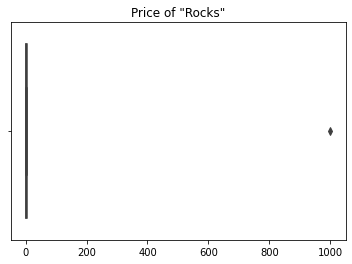

In [299]:
sns.boxplot(x=pet_rock).set_title('Price of "Rocks"')

## Example
One concrete way of thinking about the consequences of having an outlier, is that if you try to generalize a single simple 'average' customer out of this, you will be creating the illusion of a fictional class of customers and a fictional price range of products. 

(See Picture Above)
Let's say you survey a few people about how much they spent on their "pet rock."
9 out of 10 people bought a normal pet rock for 1-4 dollars. But the 10th person used the caloquialism 'rock' to refer to their diamond ring as a 'rock.' This 10th person is an 'outlier.'

So in this data set you are mixing together two completely different kinds of customers, and two completely different products (pet rocks and diamond rings). And if you simply take the mean of the raw data, you create an artfact, an illusion, a phantasm, of an 'average' customer who spends $112.80 on a "rock." 
No one is going to sell a diamond for so cheap, and no one is going to buy an ordinary rock for so much, and no one actually spent anything close to 112 USD in your data. But if you misinterpret your data you may be tricked into seeing the illusion of that artifact: an unreal customer-base buying unreal products. That cannot be good for managing a business. 

And note: That "rocks" figure above looks a lot like the raw shoes store data box plot.

(picture below)
If you remove the 'outlier.' You will have a more useful and accurate picture of your average 'rock' customer in this example. You can see the price ranged from $1-$4 with the median at 2, and also a mean of 2. When the mean and meadian are close, there is less "skew," and your data is more open to valid statistical analysis. 

mean   =  2.0
median =  2.0
mode   =  [1]


Text(0.5, 1.0, 'Price of real Rocks')

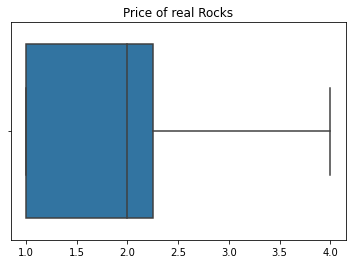

In [300]:
pet_rock = [1,2,3,1,4,2,1,2]
pet_rock = np.array(pet_rock)
pet_rock = pd.DataFrame(pet_rock)
mean = np.mean(pet_rock)
print(f"mean   = ", mean[0])
median = np.median(pet_rock)
print(f"median = ", median)
mode = stats.mode(pet_rock)[0]
print(f"mode   = ", mode[0])
sns.boxplot(x=pet_rock).set_title('Price of real Rocks')

# One Step Further...

Let's take our simple example one step further. Hopefully it was clear that you have to 'remove' the 'outlier' in order to get useful information about the 'average' customer. But...what if you are talking about a shop call "Rocks and Rocks" that really does sell both diamond rings and pet rocks (and planets, though no one buys those).  

This would mean that the few people who buy diamond rings account for most of the total sales income (dollars made, not number of items sold). 

So now you have 2 problems. You still would like to understand your 'average customer. But you cannot simply 'remove' the 'outlier' literally and ignore it, because that is most of your income! 

So you will at least need to use the data to understand what your questions should be, who your customers are, and what they are buying, and how much of total sales is from which kind of customer. And no single number is going to be able to tell you the answers to all those questions. 

## What kinds of customers (and products) does your shoe store really have?

For example if you have more than one distinct kind of customer (for example an average person buying one pair or two pairs of low cost shoe as a single purchase vs. a organization (perhaps a school or sports team) buying an entire truck load of thousands of items in a single purchase), vs. non-shoe items that cost 25k USD apiece, (just as we saw in the example above) trying to average all of those together will give you a data-artifact, an false impression of a non-existent type of customer who buys a non-existant catetory of product. (Such a mistaken impression of who your customers are could be very dangerous for buisness planning.)

Could you know if you were looking at an 'accurate' AOV vs. a dodgy maybe-unreal AOV estimate? To some extent yes. If your median and mean are the same, your data are probably normally distributed and statistics will be more powerful in thieir description of your data. But if your mean and median are very far appart, then your skewed data may be very difficult to interpret in a simplistic way. (And even if you have normally distributed data, you still want to know the range, quantiles, variance/std etc.)

Here are two important guiding questions to ask about the methods used for analysis:

1. Is it possible to use objective, standard, non-arbitrary methods to find important basic patterns in the data that are repeatable and replicable and accessible to any analyst (regardless of personal opinion and intuition)?

2. What are the buisness-action implications of these objective patterns?

My goal as an analyist will be to provide you with objective, reproducible (across different analysts, not based on any arbitrary or intuitive decisions), repeatable (using the same tools and numbers) analysis that is actionable, and all in an understandable way. 

## Splitting data into 2k_item_customer and other
First, let's separate the purchases of 2k items from the other data. Maybe, as with the 'rock-diamond' example, this will clear things up and make the data easier to understand. Let's try and find out!

Note: Even though we will look at the characteristics of the not-2k-item data set, for the final 1.5-IQR analysis we will use the original dataset. Though we will also check, to be thorough, that there is no significant difference between 1.5-IQR of the whole data and 1.5-IQR of the not_2k_items dataset.


In [301]:
# 2k-item-purchasing-customer
k2 = df[df["total_items"] == 2000.0]

# not 2k-item-customer
not_2k = df[df["total_items"] != 2000.0]

### Examining the 2k-item-purchase-data

In [302]:
# first 5 items
k2.head(5)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-07 4:00:00
60,61.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-04 4:00:00
520,521.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-02 4:00:00
1104,1105.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-24 4:00:00
1362,1363.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-15 4:00:00


In [303]:
# comparing shop 42 data to the orignal data 
df[df["shop_id"] == 42].head(20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-07 4:00:00
40,41.0,42.0,793.0,352.0,1.0,credit_card,2017-03-24 14:15:41
60,61.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-04 4:00:00
308,309.0,42.0,770.0,352.0,1.0,credit_card,2017-03-11 18:14:39
409,410.0,42.0,904.0,704.0,2.0,credit_card,2017-03-04 14:32:58
520,521.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-02 4:00:00
834,835.0,42.0,792.0,352.0,1.0,cash,2017-03-25 21:31:25
835,836.0,42.0,819.0,704.0,2.0,cash,2017-03-09 14:15:15
938,939.0,42.0,808.0,1056.0,3.0,credit_card,2017-03-13 23:43:45
979,980.0,42.0,744.0,352.0,1.0,debit,2017-03-12 13:09:04


In [304]:
df[df["shop_id"] == 42]["user_id"].value_counts()

607.0    17
770.0     2
819.0     2
868.0     2
739.0     2
934.0     1
793.0     1
904.0     1
792.0     1
808.0     1
744.0     1
797.0     1
926.0     1
907.0     1
946.0     1
756.0     1
720.0     1
872.0     1
747.0     1
970.0     1
726.0     1
830.0     1
839.0     1
975.0     1
886.0     1
962.0     1
859.0     1
788.0     1
736.0     1
809.0     1
951.0     1
Name: user_id, dtype: int64

### Note Above: 
##all k2 item sales come from store number (shop_id) 42
- user id is the same

But I do not know exactly why that is.
Maybe this more evidence that one-customer is making these sales, but still uncertain. For example it is possible that user = customer, but it is also possible that there is some difference.
- shop 42 also sells normal individual items, they do not only sell the big 2k-item-bundles 

In [305]:
# as you can see, they are all the same order number and amt.
# and all from store 42
k2["order_amount"].describe()

count        17.0
mean     704000.0
std           0.0
min      704000.0
25%      704000.0
50%      704000.0
75%      704000.0
max      704000.0
Name: order_amount, dtype: float64

In [306]:
# sum
k2_sum = k2["order_amount"].sum()
k2_sum

11968000.0

### % of Sales : 76.1 !



In [307]:
# % of renvenue that comes from
# this one irregular customer (or at least store)
# who makes the same exact repeating
# very large purchase
k2_percent = k2_sum/all_sum * 100
k2_percent

76.08979271192953

## mean unit price: suggesting ordinary shoes were purchased, not too far from the 'normal customer' mean & median (in other words: the item being purchased is likely still a shoe).

In [308]:
# average unit price for what 2k_customer buys:
avg_2k_item_price = 704000/2000
avg_2k_item_price

352.0

Text(0.5, 1.0, '2k Data')

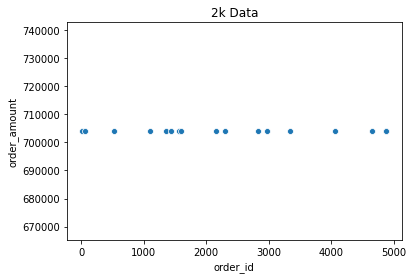

In [309]:
# by unique order number
sns.scatterplot(df["order_id"], k2["order_amount"]).set_title('2k Data')

Text(0.5, 1.0, '2k Data by user-id')

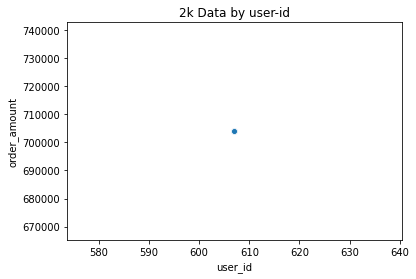

In [310]:
# by user-id
sns.scatterplot(df["user_id"], k2["order_amount"]).set_title('2k Data by user-id')

Text(0.5, 1.0, '2k Data by user-id')

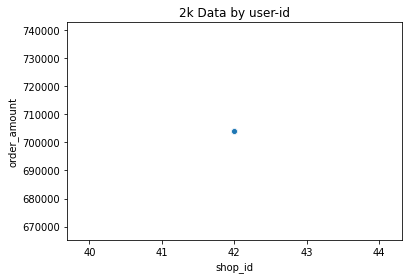

In [311]:
# by shop-id
sns.scatterplot(df["shop_id"], k2["order_amount"]).set_title('2k Data by user-id')

Text(0.5, 1.0, '2k Data')

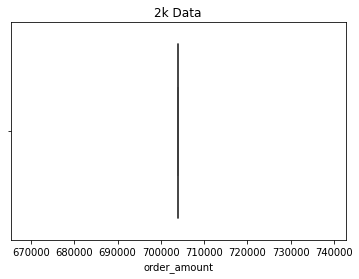

In [312]:
sns.boxplot(x=k2["order_amount"]).set_title('2k Data')

In [313]:
# Summary Statistics v3

# inputs
data = k2["order_amount"]
dataset = k2
blurb = "using 1.5 IQR from all data"

# Reports
sumary_statistics(data, blurb)
report_percentages(blurb, dataset)

Summary Statistics Report for  using 1.5 IQR from all data 

sum using 1.5 IQR from all data      =  11968000.0
range using 1.5 IQR from all data    =  0.0
variance using 1.5 IQR from all data =  0.0
stnd dev using 1.5 IQR from all data =  0.0
mean using 1.5 IQR from all data     =  704000.0
median using 1.5 IQR from all data   =  704000.0
mode using 1.5 IQR from all data     =  704000.0


Precentage Report for using 1.5 IQR from all data

Dataset Shape =  (17, 7)

% of sales              =  76.08979271192953

% of unique_order_id    =  0.33993201359728054

% of unique_shop_id     =  0.9900990099009901

% of unique customer id =  0.33112582781456956

% of_all_items_sold     =  77.38528769118717

avg number items/order   =  2000.0

only existing forms of payment include: 

credit_card    17
Name: payment_method, dtype: int64


## Not 2k
### Examining the Not 2k sales

In [314]:
not_2k.head(3)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1.0,53.0,746.0,224.0,2.0,cash,2017-03-13 12:36:56
1,2.0,92.0,925.0,90.0,1.0,cash,2017-03-03 17:38:52
2,3.0,44.0,861.0,144.0,1.0,cash,2017-03-14 4:23:56


In [315]:
# The rest of the customers
# buy between 1-8 items, 
# usually 1-3 items
not_2k["total_items"].value_counts()

2.0    1832
1.0    1830
3.0     941
4.0     293
5.0      77
6.0       9
8.0       1
Name: total_items, dtype: int64

In [316]:
not_2k["order_amount"].describe()

count      4984.000000
mean        754.571655
std        5313.666982
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      154350.000000
Name: order_amount, dtype: float64

Text(0.5, 1.0, 'Not-2k Data')

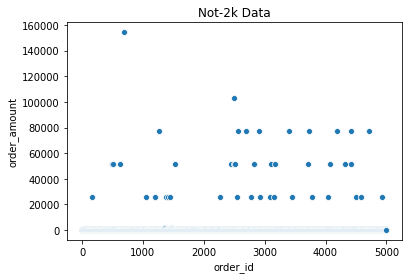

In [317]:
# by unique order number
sns.scatterplot(df["order_id"], not_2k["order_amount"]).set_title('Not-2k Data')

Text(0.5, 1.0, 'Not-2k Data')

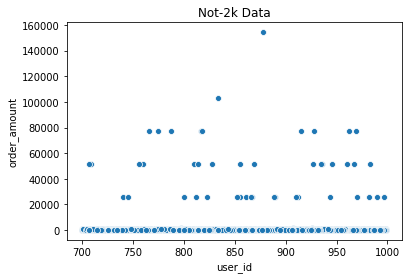

In [318]:
# by user id
sns.scatterplot(df["user_id"], not_2k["order_amount"]).set_title('Not-2k Data')

Text(0.5, 1.0, 'Not-2k Data')

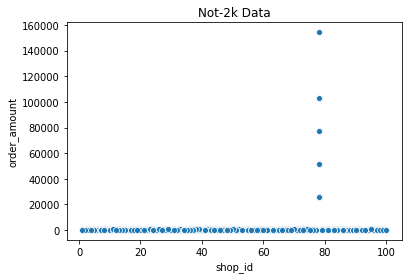

In [319]:
# by shop id
sns.scatterplot(df["shop_id"], not_2k["order_amount"]).set_title('Not-2k Data')

Text(0.5, 1.0, 'Not-2k Data')

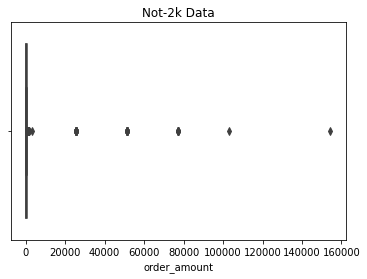

In [320]:
sns.boxplot(x=not_2k["order_amount"]).set_title('Not-2k Data')

Note: Even after we remove the 2k-items customer,
almost like a fractal regress,
the box plot still looks remarkably similar,
with so many big outliers that the upper and lower quartile
are not even clearly visible on the plot. 


# Explaining 1.5 IQR  

Using the two examples below, you can see a simplified (but still real) example of what IQR and 1.5-IQR are and how they work. 

A "Quartile" is just an extention of the idea of the median. 

If the median is the 'middle number,' the 1/2 or 2/4 number, then what is the 1/4 number? And what is the 3/4 number? Are those also useful? Indeed they are!

In fact, if you are used to looking at Box (and Whisker) plots, this is exactly what you are seeing! The box is the area from that first 1/4 number (the first quartile) to the 3/4 number (the 3rd quartile). 

The IQR is even considered one of the basic 'descriptive statistics' (even though it might not be talked about as much). 

### Ok, next step. Why 1.5 IQR?
Do you remember the old 68-95-99 rule from statistics? 
https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule

If you do, you will remember that 68.26% of the data lie in the 1st standard deviation (or 1 sigma),
95.44% is within the 2nd standard deviation (or 2 sigma), and 99.72% lies within the 3rd standard deviation (or 3 sigma).

If you could easily cut off "outliers," and unskew your data, and still keep 99% of your data, that would be great, right? Well, you can! This is what 1.5-IQR does. 

1.5-IQR is a quick way to calculate what is in 2.7 sigma (more than 99%) of the data. 

How does it work? It is very easy, but the name can sound confusing so don't get tripped up. Just remember, it isn't 1.5 * IQR, it is IQR plus and minus 1.5*  IQR. The name "1.5IQR." can sound misleading. So you are really getting 4 * IQR, which is quite a generous reach.

Take a look at the examples below, to see visually how this method can remove an outlier and still keep important data. 

Further Reading:

https://en.wikipedia.org/wiki/Interquartile_range

https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097


In [321]:
IQR_example_list = [1, 1, 1, 2, 2, 2, 3, 3, 3]
#                         |     |     |
#                       1st   median  3rd

First_Quartile = 1
Median = 2
Third_Quartile = 3

IQR_Inter_Quartile_Range = Third_Quartile - First_Quartile

#1.5 IQR
lower_limit = First_Quartile - (1.5 * IQR_Inter_Quartile_Range)
upper_limit = Third_Quartile + (1.5 * IQR_Inter_Quartile_Range)

print("lower_limit = ", lower_limit)
print("upper_limit = ", upper_limit)

lower_limit =  -2.0
upper_limit =  6.0


Even if you add an outlier, because it falls outside of 1.5_IQR it does not change your descriptive statistics. 

In [322]:
# Even if you added an outlier

IQR_example_list = [1, 1, 1, 2, 2,  2, 3, 3, 3,5000]
#                         |       |       |
#                       1st     median    3rd

First_Quartile = 1
Median = 2
Third_Quartile = 3

IQR_Inter_Quartile_Range = Third_Quartile - First_Quartile

#1.5 IQR
lower_limit = First_Quartile - (1.5 * IQR_Inter_Quartile_Range)
upper_limit = Third_Quartile + (1.5 * IQR_Inter_Quartile_Range)

print("lower_limit = ", lower_limit)
print("upper_limit = ", upper_limit)

lower_limit =  -2.0
upper_limit =  6.0


## Just to check, we will examine the 1.5 IQR data with and without removing the 2k_item_purchase data.

## 1.5-IQR from not_2k

In [323]:
# IQR Splitter V3 
# (making whole data set available)

# see https://www.statology.org/remove-outliers-python/
# IQR or Inter Quartile Range 
# is a standard, conservative, statical method
# for separating 'outliers' that are significally
# outside of the normal distribution

dataset = not_2k
data = not_2k["order_amount"]

quartile_1 = data.quantile(q=.25)
print("lower quartile  = ", quartile_1)
quartile_3 = data.quantile(q=.75)
print("upper quartile  = ", quartile_3, "\n")

IQR = quartile_3 - quartile_1
print("IQR             = ", IQR)
size_irq_1_5 = IQR * 1.5
print("size of 1.5 IQR = ", size_irq_1_5, "\n")

lower_15_iqr_limit = quartile_1 - size_irq_1_5
print("lower IQR limit = ", lower_15_iqr_limit)

upper_15_iqr_limit = quartile_1 + size_irq_1_5
print("upper IQR limit = ", upper_15_iqr_limit)

# now, separate what is inside or outside of this new 
# 1.5 IQR (inter quartile range

# variables for clarity
low = lower_15_iqr_limit
high = upper_15_iqr_limit

# Model
# 2k-item-purchasing-customer
k2 = df[df["total_items"] == 2000.0]
# not 2k-item-customer
not_2k = df[df["total_items"] != 2000.0]

# New Data
# filter out rows in 1.5 IQR
iqr_not2k = data[(data > low) & (data < high)]
# Length of in-filtered data (size)

# filter out rows NOT in 1.5 IQR
out_iqr_not2k = data[(data < low) | (data > high)]
# Length of filtered-out data (size)

# Size Comparison Printout
print("\nComparing Set Sizes:")
# Length of Data (size)
print("Input Data      = ", len(data))
print("1.5-IQR         = ", len(iqr_not2k))
print("out of 1.5-IQR  = ", len(out_iqr_not2k))

# New Datasets for % comparisons
dataset_iqr_not2k = dataset[(data > low) & (data < high)]
dataset_out_iqr_not2k = dataset[(data < low) | (data > high)]

lower quartile  =  163.0
upper quartile  =  390.0 

IQR             =  227.0
size of 1.5 IQR =  340.5 

lower IQR limit =  -177.5
upper IQR limit =  503.5

Comparing Set Sizes:
Input Data      =  4984
1.5-IQR         =  4364
out of 1.5-IQR  =  620


In [324]:
iqr_not2k.describe()

count    4364.000000
mean      260.959441
std       110.563980
min        90.000000
25%       160.000000
50%       260.000000
75%       342.000000
max       498.000000
Name: order_amount, dtype: float64

In [325]:
# Summary Statistics v3

# inputs
data = iqr_not2k
dataset = dataset_iqr_not2k
blurb = "using 1.5 IQR from all data"

# Reports
sumary_statistics(data, blurb)
report_percentages(blurb, dataset)

Summary Statistics Report for  using 1.5 IQR from all data 

sum using 1.5 IQR from all data      =  1138827.0
range using 1.5 IQR from all data    =  408.0
variance using 1.5 IQR from all data =  12221.592534609565
stnd dev using 1.5 IQR from all data =  110.55131177245056
mean using 1.5 IQR from all data     =  260.95944087992666
median using 1.5 IQR from all data   =  260.0
mode using 1.5 IQR from all data     =  153.0


Precentage Report for using 1.5 IQR from all data

Dataset Shape =  (4364, 7)

% of sales              =  7.2404002644342045

% of unique_order_id    =  87.2625474905019

% of unique_shop_id     =  98.01980198019803

% of unique customer id =  99.33774834437085

% of_all_items_sold     =  17.56418426802622

avg number items/order   =  1.7683318056828599

precent_is_cash         =  32.12648945921173

precent_is_not_cash     =  67.87351054078826

precent_of_all_cash     =  87.95483061480553

precent_of_all_not_cash =  86.96418085731062


In [326]:
# Summary Statistics v3

# inputs
data = out_iqr_not2k
dataset = dataset_out_iqr_not2k
blurb = "using 1.5 IQR from all data"

# Reports
sumary_statistics(data, blurb)
report_percentages(blurb, dataset)

Summary Statistics Report for  using 1.5 IQR from all data 

sum using 1.5 IQR from all data      =  2621958.128
range using 1.5 IQR from all data    =  153846.0
variance using 1.5 IQR from all data =  213055449.6189371
stnd dev using 1.5 IQR from all data =  14596.419068351563
mean using 1.5 IQR from all data     =  4228.964722580645
median using 1.5 IQR from all data   =  588.0
mode using 1.5 IQR from all data     =  531.0


Precentage Report for using 1.5 IQR from all data

Dataset Shape =  (620, 7)

% of sales              =  16.669807023636263

% of unique_order_id    =  12.39752049590082

% of unique_shop_id     =  91.0891089108911

% of unique customer id =  88.41059602649007

% of_all_items_sold     =  5.050528040786598

avg number items/order   =  3.5848142164781907

precent_is_cash         =  30.967741935483872

precent_is_not_cash     =  68.87096774193549

precent_of_all_cash     =  12.045169385194479

precent_of_all_not_cash =  12.536699941280094


# Tradeoffs
## Q: Is this data set normally distributed?

This shoe store question is an interesting ~'test case' for looking at the question of whether a dataset contains, in this context, normally distributed data on shoe orders. 

There are at least two ways of looking at this in a practical sense. 
On the one hand you have tests that give you the standard statistical summary information (mean, median, mode, quartiles, standard deviation, etc.) but on the other hand you have the definition of a Gaussian/Normal distribution whereby portions of data should be within standard deviations. And these two questions are not always simply the same.

For example, if only one data point was an outlier and not a majority of all sales, and when that outlier was removed the remaining data fit all the required description: 99% of data remained, the median and mean were the same, the deviation and variance were small. It would be difficult to say the data set was not a normally distributed data set. 

But in this we have a more mixed story. 

- The standard distribution of all the data was: 41278
- The standard deviation looking inside 1.5 IQR is: 110.6

That is much smaller. 

But in our drag-net of non-outliers, we were hoping for over 99% of the data (or 99% percent of the pattern?), but we only have 87.3% of the orders...how important is that? 

How important is how we define 'average order,' and how do we want to define it? 

For example: The 1.5 IQR Data
- % of sales              =  7.2404002644342045
- % of unique_order_id    =  87.2625474905019
- % of unique_shop_id     =  98.01980198019803
- % of unique customer id =  99.33774834437085

This describes 99.3% of customers, 98% of shops, but only 87% of the orders themselves...which is supposed to be our target. Or is it? And only 7.2% of sales. Can 7.2% of something be an average? What do you care most about? Average dollar coming in? Average shop selling? Avergage person buying? Average item purchased? Average order placed? 


Now, we could have taken another approach, we could have (recalling the very first picture) ignored statistics and just looked at the "common sense" shoe-priced data (which is not guaranteed to be the same between months or observers) to cherry pick what look like 'real normal shoe sales.' 

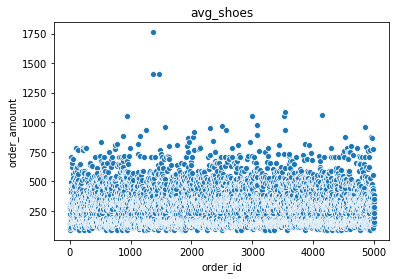

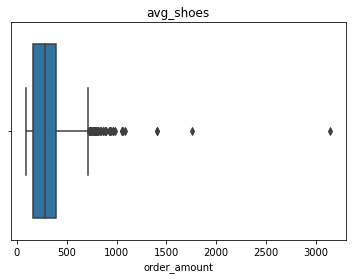

One problem is that those data are still statistically skewed; look at the descriptive statistics:

- variance avg_shoes =  27483.720564497053
- stnd dev avg_shoes =  165.7821479065133
- mean avg_shoes     =  303.1561620089105
- median avg_shoes   =  284.0
- mode avg_shoes     =  153.0

The mean and median are not the same, and both are higher then 1.5 IQR data.

Question: Are we allowed to subjectively cherry pick data for our analaysis in a way that no two people are guaranteed to agree on and which may not be applicable over time. 

Question: As we saw (above) examples of outliers and how they affect the mean, creating a fictional artifact number that does not reflect the real data, why would we leave obvious outliers in the data in this case, knowing that we are distorting the 'average'?

Question: In this case perhaps someone will say 260 USD, 284 USD, close enough. But what if this were, say, a major international online retailer and you over-estimated their average sale by $24 per order...would that be ok? 


Precentage Report for cherry picked avg_shoes
Dataset Shape =  (4938, 7)

- % of sales              =  9.517487306347034
- % of unique_order_id    =  98.74025194961008
- % of unique_shop_id     =  99.00990099009901
- % of unique customer id =  99.66887417218543
- % of_all_items_sold     =  22.41442097596504


Again we face a similar question-quandry: this arbitrary cherry-picked data contains 98.7% of the orders, but still less than 10% of sales-dollars.  

So which would you rather have?

A. A standard systematic removal of outliers resulting in a nearly normal distribution with a nearly identical median and mean, which will be condusive to statistical analysis, but which only contains 87.3% of all orders. This approach also comes with the ability to identify what portion of sales are around a shared median and mode. This is also a reliably repeatable and replicable standard method.

B. A subjectively cherry picked set of data (which no two people can be guaranteed to select the same way and which may vary from month to month) which contains skewed-non-normally distributed (not statistically reliable) data, and still a minority of sales, still contains outliers, but retains 98.7 % of orders.  

C. The raw median of non-normally distributed data set, about which little can be said with any confidence. 

I am inclined to select option A. I recommend option A. 

And both options A nd B are less than 10% of overall sales, which must be significant. 

Another important consideration is: Is this a thin-margin high volume buisness where every penny counts? Or are you looking for a rough estimate give or take $20. This may raise the stakes on chosing between 260 and 284 (or some other AOL). 


## All Data 1.5 IQR

Finally, after having carefully examined and compared and check on what we are doing, we can get to the main analysis we have been hoping for: the 1.5 IQR of the whole data set!

In [327]:
# IQR Splitter V3 
# (making whole data set available)

# see https://www.statology.org/remove-outliers-python/
# IQR or Inter Quartile Range 
# is a standard, conservative, statical method
# for separating 'outliers' that are significally
# outside of the normal distribution

dataset = df
data = df["order_amount"]

quartile_1 = data.quantile(q=.25)
print("lower quartile  = ", quartile_1)
quartile_3 = data.quantile(q=.75)
print("upper quartile  = ", quartile_3, "\n")

IQR = quartile_3 - quartile_1
print("IQR             = ", IQR)
size_irq_1_5 = IQR * 1.5
print("size of 1.5 IQR = ", size_irq_1_5, "\n")

lower_15_iqr_limit = quartile_1 - size_irq_1_5
print("lower IQR limit = ", lower_15_iqr_limit)

upper_15_iqr_limit = quartile_1 + size_irq_1_5
print("upper IQR limit = ", upper_15_iqr_limit)

# now, separate what is inside or outside of this new 
# 1.5 IQR (inter quartile range

# variables for clarity
low = lower_15_iqr_limit
high = upper_15_iqr_limit


# New Data
# filter out rows in 1.5 IQR
in_iqr = data[(data > low) & (data < high)]
# Length of in-filtered data (size)

# filter out rows NOT in 1.5 IQR
out_iqr = data[(data < low) | (data > high)]
# Length of filtered-out data (size)

# Size Comparison Printout
print("\nComparing Set Sizes:")
# Length of Data (size)
print("Input Data      = ", len(data))
print("1.5-IQR         = ", len(in_iqr))
print("out of 1.5-IQR  = ", len(out_iqr))

# New Datasets for % comparisons
dataset_in_iqr = dataset[(data > low) & (data < high)]
dataset_out_iqr = dataset[(data < low) | (data > high)]

lower quartile  =  163.0
upper quartile  =  390.0 

IQR             =  227.0
size of 1.5 IQR =  340.5 

lower IQR limit =  -177.5
upper IQR limit =  503.5

Comparing Set Sizes:
Input Data      =  5001
1.5-IQR         =  4364
out of 1.5-IQR  =  637


## in 1.5 IQR


In [328]:
in_iqr.head()

0    224.0
1     90.0
2    144.0
3    156.0
4    156.0
Name: order_amount, dtype: float64

In [329]:
iqr_not2k.describe()

count    4364.000000
mean      260.959441
std       110.563980
min        90.000000
25%       160.000000
50%       260.000000
75%       342.000000
max       498.000000
Name: order_amount, dtype: float64

Take a good look! We are now seeing for the first time, what the 1.5 IQR data look like. In other words, when you remove the statisical outliers, these are the data that remain. Feast your eyes!

## By Order Number

Text(0.5, 1.0, 'in 1.5 iqr not2k')

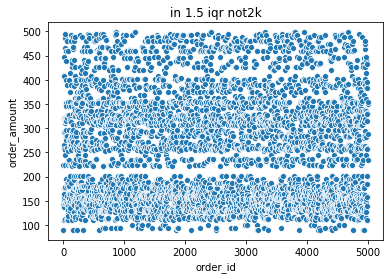

In [330]:
# by unique order number
sns.scatterplot(df["order_id"], in_iqr).set_title('in 1.5 iqr not2k')

## By User ID

Text(0.5, 1.0, 'in 1.5 iqr not2k')

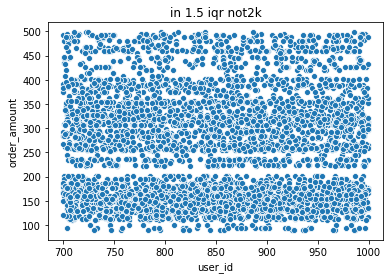

In [331]:
# by user id
sns.scatterplot(df["user_id"], in_iqr).set_title('in 1.5 iqr not2k')

## By Shop ID

Text(0.5, 1.0, 'in 1.5 iqr not2k')

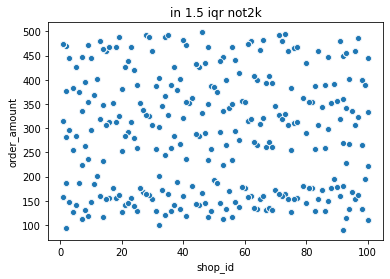

In [332]:
# by shop id
sns.scatterplot(df["shop_id"], in_iqr).set_title('in 1.5 iqr not2k')

## Box and Whisker Plot

Text(0.5, 1.0, 'in 1.5 iqr')

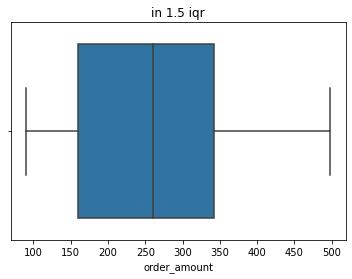

In [333]:
sns.boxplot(x=in_iqr).set_title('in 1.5 iqr')

Text(0.5, 1.0, 'in 1.5 iqr')

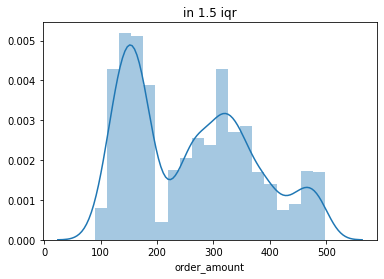

In [334]:
sns.distplot(in_iqr).set_title('in 1.5 iqr')

In [335]:
# Summary Statistics v3

# inputs
data = in_iqr
dataset = dataset_in_iqr
blurb = "using 1.5 IQR from all data"

# Reports
sumary_statistics(data, blurb)
report_percentages(blurb, dataset)

Summary Statistics Report for  using 1.5 IQR from all data 

sum using 1.5 IQR from all data      =  1138827.0
range using 1.5 IQR from all data    =  408.0
variance using 1.5 IQR from all data =  12221.592534609565
stnd dev using 1.5 IQR from all data =  110.55131177245056
mean using 1.5 IQR from all data     =  260.95944087992666
median using 1.5 IQR from all data   =  260.0
mode using 1.5 IQR from all data     =  153.0


Precentage Report for using 1.5 IQR from all data

Dataset Shape =  (4364, 7)

% of sales              =  7.2404002644342045

% of unique_order_id    =  87.2625474905019

% of unique_shop_id     =  98.01980198019803

% of unique customer id =  99.33774834437085

% of_all_items_sold     =  17.56418426802622

avg number items/order   =  1.7683318056828599

precent_is_cash         =  32.12648945921173

precent_is_not_cash     =  67.87351054078826

precent_of_all_cash     =  87.95483061480553

precent_of_all_not_cash =  86.96418085731062


## out_iqr

In [336]:
out_iqr.describe()

count       637.000000
mean      22904.172885
std      113786.208722
min         504.000000
25%         532.000000
50%         590.000000
75%         710.000000
max      704000.000000
Name: order_amount, dtype: float64

Text(0.5, 1.0, 'outside 1.5 iqr not2k')

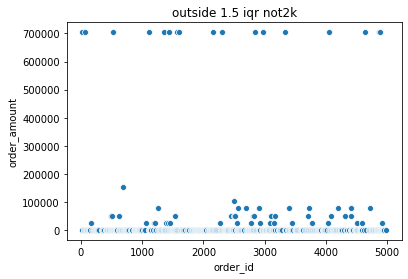

In [337]:
# by order_id
sns.scatterplot(df["order_id"], out_iqr).set_title('outside 1.5 iqr not2k')

Text(0.5, 1.0, 'outside 1.5 iqr not2k')

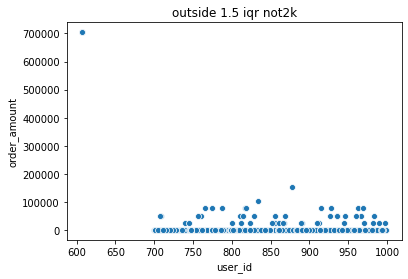

In [338]:
# by user id
sns.scatterplot(df["user_id"], out_iqr).set_title('outside 1.5 iqr not2k')

Text(0.5, 1.0, 'outside 1.5 iqr not2k')

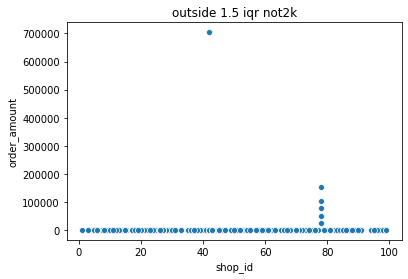

In [339]:
# by shop id
sns.scatterplot(df["shop_id"], out_iqr).set_title('outside 1.5 iqr not2k')

Text(0.5, 1.0, 'outside 1.5 iqr not2k')

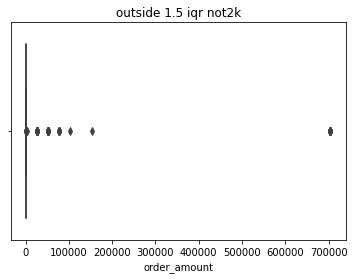

In [340]:
sns.boxplot(x=out_iqr).set_title('outside 1.5 iqr not2k')

In [341]:
# Summary Statistics v3

# inputs
data = out_iqr
dataset = dataset_out_iqr
blurb = "out of 1.5 IQR from all data"

# Reports
sumary_statistics(data, blurb)
report_percentages(blurb, dataset)

Summary Statistics Report for  out of 1.5 IQR from all data 

sum out of 1.5 IQR from all data      =  14589958.128
range out of 1.5 IQR from all data    =  703496.0
variance out of 1.5 IQR from all data =  12926975861.59603
stnd dev out of 1.5 IQR from all data =  113696.85950630311
mean out of 1.5 IQR from all data     =  22904.172885400316
median out of 1.5 IQR from all data   =  590.0
mode out of 1.5 IQR from all data     =  531.0


Precentage Report for out of 1.5 IQR from all data

Dataset Shape =  (637, 7)

% of sales              =  92.75959973556579

% of unique_order_id    =  12.737452509498102

% of unique_shop_id     =  91.0891089108911

% of unique customer id =  88.74172185430463

% of_all_items_sold     =  82.43581573197378

avg number items/order   =  56.948113207547166

precent_is_cash         =  30.141287284144425

precent_is_not_cash     =  69.70172684458399

precent_of_all_cash     =  12.045169385194479

precent_of_all_not_cash =  13.035819142689373


## More Examination of High Priced Items

As you can see from the analyis below, there are a number of odd characteristics of these high priced items. Not only do they fall roughly at 25k incriments, they are EXACT multiples of the single item price and correspond by number of items purchased to being that number of items. 
e.g. if they buy one item, it costs 25725 * 1
if they buy 3 items, it costs 25725 * 3, and so on.

Also note:
- all high price items are sold from one single shop: shop_id = 78
- there was only one repeat customer, all other sales to separate users
- that shop does not appear to have made any other item-price sales

But without item_id data, we can't say for sure what is going on. 
- Are these the same item, or different items with a standardized price?
- Is this is a shoe? (hard to believe, by physically possible)
- Is this a book keeping error on the part of that one shop?

And without knowing what is going on, we cannot do more clear analysis. Maybe these are separate products, but maybe not.

Also note, this seems to contradict the information that we were given about the data, that all items are "affordable" shoes. This seems to indicate a problem somewhere, either an problem with the description of the data or perhaps errors or bookkeeping issues with the seller. 

In [342]:
# mysterious high price items

ticket_price = 25725 

for i in range(7):
  print(ticket_price * i)

0
25725
51450
77175
102900
128625
154350


In [343]:
df[df["shop_id"] == 78]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161.0,78.0,990.0,25725.0,1.0,credit_card,2017-03-12 5:56:57
490,491.0,78.0,936.0,51450.0,2.0,debit,2017-03-26 17:08:19
493,494.0,78.0,983.0,51450.0,2.0,cash,2017-03-16 21:39:35
511,512.0,78.0,967.0,51450.0,2.0,cash,2017-03-09 7:23:14
617,618.0,78.0,760.0,51450.0,2.0,cash,2017-03-18 11:18:42
691,692.0,78.0,878.0,154350.0,6.0,debit,2017-03-27 22:51:43
1056,1057.0,78.0,800.0,25725.0,1.0,debit,2017-03-15 10:16:45
1193,1194.0,78.0,944.0,25725.0,1.0,debit,2017-03-16 16:38:26
1204,1205.0,78.0,970.0,25725.0,1.0,credit_card,2017-03-17 22:32:21
1259,1260.0,78.0,775.0,77175.0,3.0,credit_card,2017-03-27 9:27:20


In [344]:
# only one repeat sale
df[df["shop_id"] == 78]["user_id"].value_counts()

855.0    2
823.0    1
962.0    1
861.0    1
935.0    1
707.0    1
834.0    1
709.0    1
810.0    1
812.0    1
912.0    1
867.0    1
775.0    1
970.0    1
944.0    1
800.0    1
878.0    1
760.0    1
967.0    1
983.0    1
936.0    1
915.0    1
890.0    1
818.0    1
869.0    1
997.0    1
866.0    1
969.0    1
756.0    1
960.0    1
787.0    1
946.0    1
852.0    1
889.0    1
766.0    1
828.0    1
982.0    1
928.0    1
927.0    1
745.0    1
910.0    1
740.0    1
817.0    1
814.0    1
990.0    1
Name: user_id, dtype: int64

## Experimental Examination
### 2nd filter
### Examine what was outside of the first iqr filter
### i.e. What does the middle group look like when split?

Because the above box plot of the out-of-1.5-IQR non-2k data looks (at least by appearances) to be maybe 2 distinct layers, let's try one more 1.5-IQR split to see if this really is 2 more groups. (Which could suggest that there are 4 distict groups of customers.)

In [345]:
# IQR Splitter V3 
# (making whole data set available)

# see https://www.statology.org/remove-outliers-python/
# IQR or Inter Quartile Range 
# is a standard, conservative, statical method
# for separating 'outliers' that are significally
# outside of the normal distribution

data = out_iqr
dataset = dataset_out_iqr

quartile_1 = data.quantile(q=.25)
print("lower quartile  = ", quartile_1)
quartile_3 = data.quantile(q=.75)
print("upper quartile  = ", quartile_3, "\n")

IQR = quartile_3 - quartile_1
print("IQR             = ", IQR)
size_irq_1_5 = IQR * 1.5
print("size of 1.5 IQR = ", size_irq_1_5, "\n")

lower_15_iqr_limit = quartile_1 - size_irq_1_5
print("lower IQR limit = ", lower_15_iqr_limit)

upper_15_iqr_limit = quartile_1 + size_irq_1_5
print("upper IQR limit = ", upper_15_iqr_limit)

# now, separate what is inside or outside of this new 
# 1.5 IQR (inter quartile range

# variables for clarity
low = lower_15_iqr_limit
high = upper_15_iqr_limit


# New Data
# filter out rows in 1.5 IQR
in_iqr = data[(data > low) & (data < high)]
# Length of in-filtered data (size)

# filter out rows NOT in 1.5 IQR
out_iqr = data[(data < low) | (data > high)]
# Length of filtered-out data (size)

# Size Comparison Printout
print("\nComparing Set Sizes:")
# Length of Data (size)
print("Input Data      = ", len(data))
print("1.5-IQR         = ", len(iqr_not2k))
print("out of 1.5-IQR  = ", len(out_iqr))

# New Datasets for % comparisons
dataset_in_iqr = dataset[(data > low) & (data < high)]
dataset_out_iqr = dataset[(data < low) | (data > high)]

lower quartile  =  532.0
upper quartile  =  710.0 

IQR             =  178.0
size of 1.5 IQR =  267.0 

lower IQR limit =  265.0
upper IQR limit =  799.0

Comparing Set Sizes:
Input Data      =  637
1.5-IQR         =  4364
out of 1.5-IQR  =  104


## in_iqr 


In [346]:
in_iqr.describe()

count    533.000000
mean     595.388368
std       78.020392
min      504.000000
25%      531.000000
50%      570.000000
75%      648.000000
max      790.000000
Name: order_amount, dtype: float64

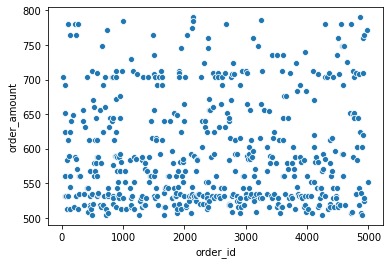

In [347]:
sns.scatterplot(df["order_id"], in_iqr)

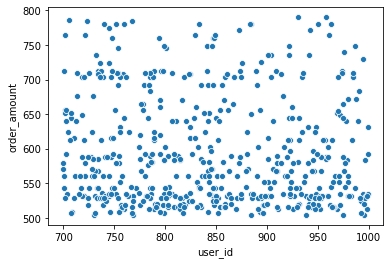

In [348]:
sns.scatterplot(df["user_id"], in_iqr)

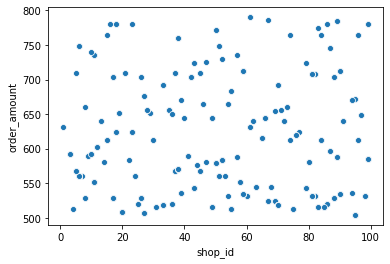

In [349]:
sns.scatterplot(df["shop_id"], in_iqr)

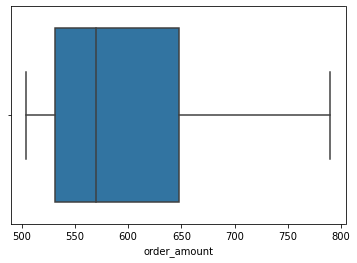

In [350]:
sns.boxplot(x=in_iqr)

In [351]:
# Summary Statistics

data = in_iqr
blurb = "1.5 IQR not2k data"
sumary_statistics(data, blurb)
# Note: sum is total sales for this group:

# % of sales
iqr_sum = np.sum(data)
out_iqr_percent = iqr_sum/all_sum * 100
print(f"\n% income from {blurb},", out_iqr_percent)

Summary Statistics Report for  1.5 IQR not2k data 

sum 1.5 IQR not2k data      =  317342.0
range 1.5 IQR not2k data    =  286.0
variance 1.5 IQR not2k data =  6075.7609903938555
stnd dev 1.5 IQR not2k data =  77.94716794338237
mean 1.5 IQR not2k data     =  595.3883677298311
median 1.5 IQR not2k data   =  570.0
mode 1.5 IQR not2k data     =  531.0

% income from 1.5 IQR not2k data, 2.0175874831875955


herehere

In [352]:
# Summary Statistics v3

# inputs
data = in_iqr
dataset = dataset_in_iqr
blurb = "1.5 IQR not2k data"

# Reports
sumary_statistics(data, blurb)
report_percentages(blurb, dataset)

Summary Statistics Report for  1.5 IQR not2k data 

sum 1.5 IQR not2k data      =  317342.0
range 1.5 IQR not2k data    =  286.0
variance 1.5 IQR not2k data =  6075.7609903938555
stnd dev 1.5 IQR not2k data =  77.94716794338237
mean 1.5 IQR not2k data     =  595.3883677298311
median 1.5 IQR not2k data   =  570.0
mode 1.5 IQR not2k data     =  531.0


Precentage Report for 1.5 IQR not2k data

Dataset Shape =  (533, 7)

% of sales              =  2.0175874831875955

% of unique_order_id    =  10.657868426314737

% of unique_shop_id     =  89.10891089108911

% of unique customer id =  83.11258278145695

% of_all_items_sold     =  4.399581209031318

avg number items/order   =  3.626641651031895

precent_is_cash         =  30.76923076923077

precent_is_not_cash     =  69.23076923076923

precent_of_all_cash     =  10.28858218318695

precent_of_all_not_cash =  10.833822665883734


## out_iqr

In [353]:
out_iqr.describe()

count       104.000000
mean     137236.693538
std      253322.307488
min         800.000000
25%         935.000000
50%       25725.000000
75%       77175.000000
max      704000.000000
Name: order_amount, dtype: float64

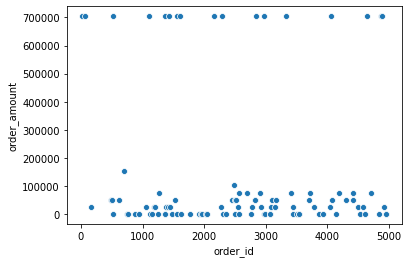

In [354]:
sns.scatterplot(df["order_id"], out_iqr)

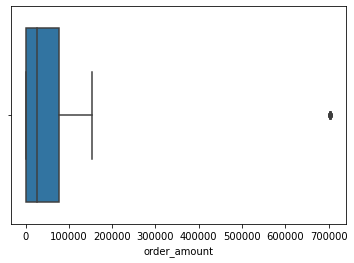

In [355]:
sns.boxplot(x=out_iqr)

In [356]:
# Summary Statistics v3

# inputs
data = out_iqr
dataset = dataset_out_iqr
blurb = "out 1.5 IQR from not2k"

# Reports
sumary_statistics(data, blurb)
report_percentages(blurb, dataset)

Summary Statistics Report for  out 1.5 IQR from not2k 

sum out 1.5 IQR from not2k      =  14272616.128
range out 1.5 IQR from not2k    =  703200.0
variance out 1.5 IQR from not2k =  63555151168.50663
stnd dev out 1.5 IQR from not2k =  252101.46998481906
mean out 1.5 IQR from not2k     =  137236.69353846155
median out 1.5 IQR from not2k   =  25725.0
mode out 1.5 IQR from not2k     =  25725.0


Precentage Report for out 1.5 IQR from not2k

Dataset Shape =  (104, 7)

% of sales              =  90.7420122523782

% of unique_order_id    =  2.0795840831833634

% of unique_shop_id     =  27.722772277227726

% of unique customer id =  26.82119205298013

% of_all_items_sold     =  78.03623452294246

avg number items/order   =  332.873786407767

precent_is_cash         =  26.923076923076923

precent_is_not_cash     =  72.11538461538461

precent_of_all_cash     =  1.7565872020075282

precent_of_all_not_cash =  2.201996476805637


In [357]:
in_iqr.describe()

count    533.000000
mean     595.388368
std       78.020392
min      504.000000
25%      531.000000
50%      570.000000
75%      648.000000
max      790.000000
Name: order_amount, dtype: float64

In [358]:
out_iqr.describe()

count       104.000000
mean     137236.693538
std      253322.307488
min         800.000000
25%         935.000000
50%       25725.000000
75%       77175.000000
max      704000.000000
Name: order_amount, dtype: float64

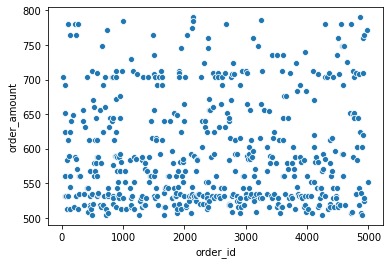

In [359]:
sns.scatterplot(df["order_id"], in_iqr)

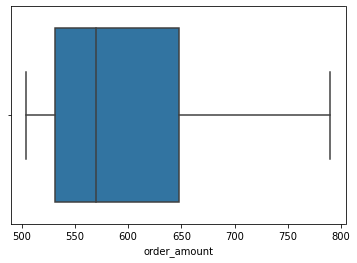

In [360]:
sns.boxplot(x=in_iqr)

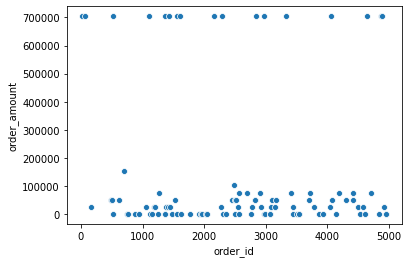

In [361]:
sns.scatterplot(df["order_id"], out_iqr)

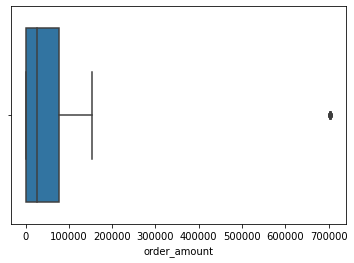

In [362]:
sns.boxplot(x=out_iqr)

In [363]:
# Summary Statistics

data = in_iqr
blurb = "1.5 IQR from just middle"

sumary_statistics(data, blurb)

# Note: sum is total sales for this group:

Summary Statistics Report for  1.5 IQR from just middle 

sum 1.5 IQR from just middle      =  317342.0
range 1.5 IQR from just middle    =  286.0
variance 1.5 IQR from just middle =  6075.7609903938555
stnd dev 1.5 IQR from just middle =  77.94716794338237
mean 1.5 IQR from just middle     =  595.3883677298311
median 1.5 IQR from just middle   =  570.0
mode 1.5 IQR from just middle     =  531.0


In [364]:
# Summary Statistics

data = out_iqr
blurb = "not 1.5 IQR from just middle"

sumary_statistics(data, blurb)

# Note: sum is total sales for this group:

Summary Statistics Report for  not 1.5 IQR from just middle 

sum not 1.5 IQR from just middle      =  14272616.128
range not 1.5 IQR from just middle    =  703200.0
variance not 1.5 IQR from just middle =  63555151168.50663
stnd dev not 1.5 IQR from just middle =  252101.46998481906
mean not 1.5 IQR from just middle     =  137236.69353846155
median not 1.5 IQR from just middle   =  25725.0
mode not 1.5 IQR from just middle     =  25725.0


In [365]:
# % of renvenue that comes from
# this one irregular customer 
# who makes the same exact repeating
# very large purchase

iqr_sum = np.sum(data)

out_iqr_percent = iqr_sum/all_sum * 100
print(f"% income from {blurb},", out_iqr_percent)

% income from not 1.5 IQR from just middle, 90.7420122523782


In [366]:
# remaining percent
15.7 * .761

11.9477

# And just one more visualization and data set: Shoes!
No more mystery items, no more 2k customers, lets just look at 
'normal' shoe purchases. Ah...that feels nice.

Text(0.5, 1.0, 'avg_shoes')


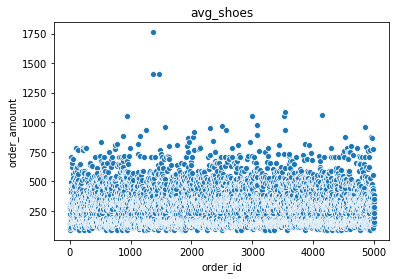

In [367]:
avg_shoes = df[df["order_amount"] < 25000]
blurb = "avg_shoes"
dataset = avg_shoes["order_amount"]

print(sns.scatterplot(df["order_id"], dataset).set_title(blurb))

## Full Results of Experimental Examination

There is a disjunction, or a fork in the road, between "average-ness" (including quartile ranges) on the one hand, and 'specific products and customers on the other hand.

You can either make a graph (and data-set) of one, or of the other, but there they are not the same. 

For example, looking even at 2 levels of 1.5 IQR filtering, you still have no idea how much people are spending on shoes overall. This is because the question was about averages, not about shoes. And so few 'normal' people (and even normally abnormal people) buy more than ~800 worth of shoes that the picture becomes fragmented. 

Normal people spend up to ~ 500 dollars on shoes. normal odd people spend ~ 500-800 dollars on shoes. But because of the increasing rareness (down to one single purchase of the most expensive 'normal shoes' (not those mystery 25k items) even though these are normal shoes their purchase rate is so low that they are outside of 1.5 IQR (they are outlier). 



# Headline Conclusion:  $260 avg is 7% of Sales

### ~$260 is the mean and median for 1.5-IQR of Order values, accurately decribing what an 'average' customer who enters the store is most likely to spend.
# AND
### These normal, average, customers represent ONLY 7.2% of your sales. To understand and take action your customers you must include and understand at least at least 3 (or 4) categories of customers:

## Catagories of Customer:
Out of 15.7 million USD Total Sales:


- Category 1: People who by shoes (priced up to about 2k USD)
- Category 2: People who buy mysterious 25K USD items
- Category 3: Customers (whole sale institutions?) who buy 2k_item sets of ~300 USD shoes
- Category 4: The statistical average and more normally distributed order/customer, using 1.5 IQR to remove outliers in a standardized way.



#Catagory 1

### Who are they?
  Probably a single mass buyer_id_609, from shop_id_42

### How much do they spend?
  They spend 11.9 million USD as a category.
  
### What are they buying? (average item price)
  They buy exactly 2000 items for exactly 704K USD for the same price repeatedly
  An ~average item price of 352USD, so normal items. (slighlty over the mean/median of 1.5 IQR of order value.

### What % of sales are they?
  They make up 76.1% of sales

### Notes:
Only at shop 42, only using a credit card, only in the same quantity

##Summary Statistics Report for  using 1.5 IQR from all data 

sum using 1.5 IQR from all data      =  $11,968,000.0

range using 1.5 IQR from all data    =  $0.0

variance using 1.5 IQR from all data =  0.0

stnd dev using 1.5 IQR from all data =  0.0

mean using 1.5 IQR from all data     =  $704,000.0

median using 1.5 IQR from all data   =  $704,000.0

mode using 1.5 IQR from all data     =  $704,000.0


##Precentage Report for using 1.5 IQR from all data

Dataset Shape =  (17, 7)

% of sales              =  76.08979271192953

% of unique_order_id    =  0.33993201359728054

% of unique_shop_id     =  0.9900990099009901

% of unique customer id =  0.33112582781456956

% of_all_items_sold     =  77.38528769118717

avg number items/order   =  2000.0

only existing forms of payment include: credit_card    17



#Category 2 

### Who are they?
  high-price customers

### How much do they spend?
  They spend 2.26 million USD as a category.

### What are they buying? (average item price)
 who spend a mean-average of 22k on ~3 items 

##(what are they buying in a shoe store for that much? this may be a book-keeping problem): 

sum Mystery Items      =  $2,263,800.0

mean Mystery Items     =  $49,213

median Mystery Items   =  $51,450

Precentage Report for Mystery Items
Dataset Shape =  (46, 7)
% of sales              =  14.392719981723435

% of unique_order_id    =  0.9198160367926416

% of unique_shop_id     =  0.9900990099009901

% of unique customer id =  14.90066225165563

% of_all_items_sold     =  0.2002913328477786



#3. The Normal Shoes in Normal Quantities Category

### Who are they?
  Note, this is not the same as the average customer!
  
  You can either look at all normal shoes, or look at all normal purchases
  but they are not the same.

### How much do they spend?
  $1,496,985.13

### What are they buying? 
This is all normal shoes, not just the most-average ones.

### What % of sales are they?
  They make up 9.5% of sales

## Summary Statistics Report for  avg_shoes 

sum avg_shoes      =  $1,496,985.13

range avg_shoes    =  $3055

mean avg_shoes     =  $303

median avg_shoes   =  $284

## Precentage Report for avg_shoes
Dataset Shape =  (4938, 7)

% of sales              =  9.517487306347034

% of unique_order_id    =  98.74025194961008

% of unique_shop_id     =  99.00990099009901

% of unique customer id =  99.66887417218543

% of_all_items_sold     =  22.41442097596504

precent_is_cash         =  31.915755366545163

precent_is_not_cash     =  68.06399351964359

precent_of_all_cash     =  98.87076537013802

precent_of_all_not_cash =  98.67880211391662

#4 statistical Average customer (after 1.5 IQR on order_amount)

### Who are they?
This is the statistically average normal customer.

### How much do they spend?
  $1,138,827

### What are they buying? (average item price)
A range of normal shoes at a range of normal prices, 

in a range of normal quantities.

mean avg_shoes     =  $303

median avg_shoes   =  $284

on ~3 items

### What % of sales are they?
7.2$

## Summary Statistics Report for  using 1.5 IQR from all data 

sum using 1.5 IQR from all data      =  $1138827.0

range using 1.5 IQR from all data    =  $408.0

variance using 1.5 IQR from all data =  $12221.592534609565

stnd dev using 1.5 IQR from all data =  110.55131177245056

mean using 1.5 IQR from all data     =  $260.95944087992666

median using 1.5 IQR from all data   =  $260.0

mode using 1.5 IQR from all data     =  $153.0


## Precentage Report for using 1.5 IQR from all data

Dataset Shape =  (4364, 7)

% of sales              =  7.2404002644342045

% of unique_order_id    =  87.2625474905019

% of unique_shop_id     =  98.01980198019803

% of unique customer id =  99.33774834437085

% of_all_items_sold     =  17.56418426802622

avg number items/order   =  1.7683318056828599

precent_is_cash         =  32.12648945921173

precent_is_not_cash     =  67.87351054078826

precent_of_all_cash     =  87.95483061480553

precent_of_all_not_cash =  86.96418085731062

Recommended actions based on this breakdown:
- Keep your one big customer by any means (hire specialists to focus on and attend to them, and get more similar big customers if possible. Looking that one custmer could sink your whole business.
- Find out what the high-price customers are buying. Maybe have separate advertising and outreach for them.
- Try to increase the number of 'average' customers. They are probably the most stable and reliable part of your buisness, but they represent such a small % of your income that they almost don't matter. Some buisness strategiest would recommend ditching these customers to focus on high-paying customers, but that is a high-risk strategy and arguably ethically dubious in a broader perspective of your business' 'stakeholders.' 

# You can see these 3 layers in a basic scatterplot of the values

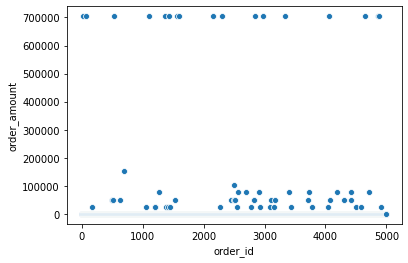

In [368]:
sns.scatterplot(df["order_id"], df["order_amount"])

# End of main Report



# Supplimental Report: Cherry Picking Customer Categories for Comparison and Examination

In [370]:
# mysterious high price items

ticket_price = 25725 

for i in range(7):
  print(ticket_price * i)

0
25725
51450
77175
102900
128625
154350


In [371]:
df[df["shop_id"] == 78]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161.0,78.0,990.0,25725.0,1.0,credit_card,2017-03-12 5:56:57
490,491.0,78.0,936.0,51450.0,2.0,debit,2017-03-26 17:08:19
493,494.0,78.0,983.0,51450.0,2.0,cash,2017-03-16 21:39:35
511,512.0,78.0,967.0,51450.0,2.0,cash,2017-03-09 7:23:14
617,618.0,78.0,760.0,51450.0,2.0,cash,2017-03-18 11:18:42
691,692.0,78.0,878.0,154350.0,6.0,debit,2017-03-27 22:51:43
1056,1057.0,78.0,800.0,25725.0,1.0,debit,2017-03-15 10:16:45
1193,1194.0,78.0,944.0,25725.0,1.0,debit,2017-03-16 16:38:26
1204,1205.0,78.0,970.0,25725.0,1.0,credit_card,2017-03-17 22:32:21
1259,1260.0,78.0,775.0,77175.0,3.0,credit_card,2017-03-27 9:27:20


In [372]:
# Splitting Up Data into Products
k2 = df[df["total_items"] == 2000.0]

mystery_items = df[df["shop_id"] == 78]

avg_shoes = df[df["order_amount"] < 25000]

graph_data = [["k2", k2["order_amount"]] ,["mystery_items", mystery_items["order_amount"]], ["avg_shoes", avg_shoes["order_amount"]]]

## 2K Items Customer

Text(0.5, 1.0, 'ks order_amount')


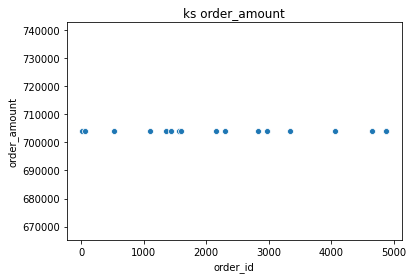

In [373]:
blurb = "ks order_amount"
dataset = k2["order_amount"]

print(sns.scatterplot(df["order_id"], dataset).set_title(blurb))

Text(0.5, 1.0, 'ks order_amount')


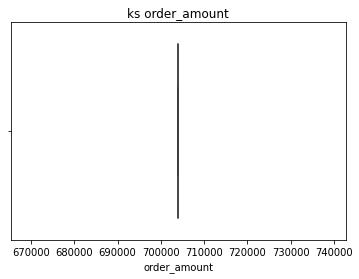

In [374]:
print(sns.boxplot(x = dataset).set_title(blurb))

## Mystery 25K Items Shop

## Note on Middle Group

Because so little is known about the middle high-spending group, it may be a waste of time to micro-analyse one month worth of data. 

E.g. If month to month variation is high or this month is an aberration, any method used to futher sub-divide this group may turn out to be errotious over time. 

'Needs Futher examination over time' is probably all that can be said of the middle group so far.

Question 1: 
What is being purchased that costs so much for a small number of shoe-store items? This requires additional data, without which any futher analysis of this data may be useless.





In [375]:
# Summary Statistics v3

# inputs
mystery_dataset = mystery_items
blurb = "Mystery Items"
myster_amounts = mystery_dataset["order_amount"]


data = myster_amounts
dataset = mystery_dataset

# Reports
sumary_statistics(data, blurb)
report_percentages(blurb, dataset)

Summary Statistics Report for  Mystery Items 

sum Mystery Items      =  2263800.0
range Mystery Items    =  128625.0
variance Mystery Items =  685544503.7807181
stnd dev Mystery Items =  26182.90480028368
mean Mystery Items     =  49213.04347826087
median Mystery Items   =  51450.0
mode Mystery Items     =  25725.0


Precentage Report for Mystery Items

Dataset Shape =  (46, 7)

% of sales              =  14.392719981723435

% of unique_order_id    =  0.9198160367926416

% of unique_shop_id     =  0.9900990099009901

% of unique customer id =  14.90066225165563

% of_all_items_sold     =  0.2002913328477786

avg number items/order   =  1.9130434782608696

precent_is_cash         =  21.73913043478261

precent_is_not_cash     =  78.26086956521739

precent_of_all_cash     =  0.6273525721455459

precent_of_all_not_cash =  1.0569583088667058


Text(0.5, 1.0, 'mystery_items')


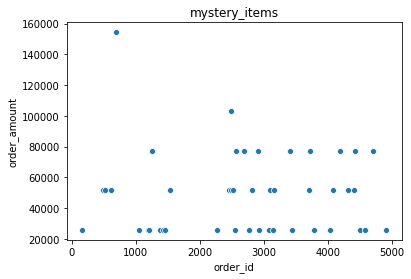

In [376]:
blurb = "mystery_items"
dataset = mystery_items["order_amount"]

print(sns.scatterplot(df["order_id"], dataset).set_title(blurb))

Text(0.5, 1.0, 'mystery_items')


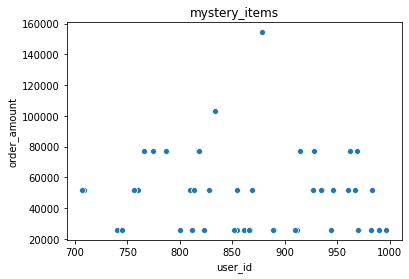

In [377]:
# by user-id
blurb = "mystery_items"
dataset = mystery_items["order_amount"]

print(sns.scatterplot(df["user_id"], dataset).set_title(blurb))

Text(0.5, 1.0, 'mystery_items')


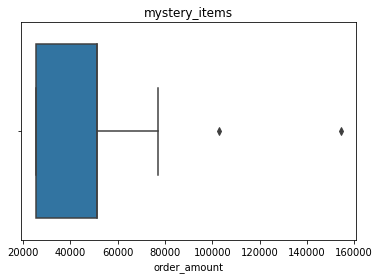

In [378]:
print(sns.boxplot(x = dataset).set_title(blurb))

## Average Shoes & Customer

Text(0.5, 1.0, 'avg_shoes')


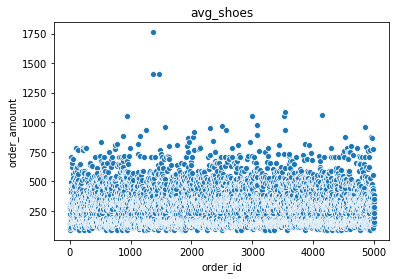

In [379]:
# inputs
avg_shoes_dataset = df[df["order_amount"] < 25000]
blurb = "avg_shoes"
avg_shoes = avg_shoes_dataset["order_amount"]

print(sns.scatterplot(df["order_id"], avg_shoes).set_title(blurb))

Text(0.5, 1.0, 'avg_shoes')


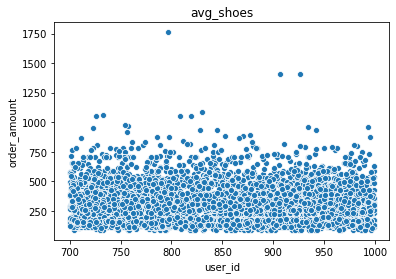

In [380]:
print(sns.scatterplot(df["user_id"], avg_shoes).set_title(blurb))

Text(0.5, 1.0, 'avg_shoes')


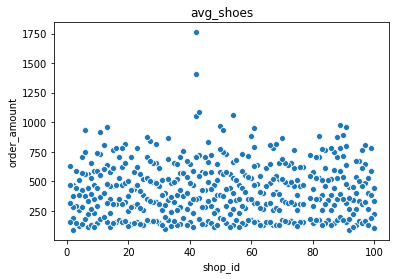

In [381]:
print(sns.scatterplot(df["shop_id"], avg_shoes).set_title(blurb))

Text(0.5, 1.0, 'avg_shoes')


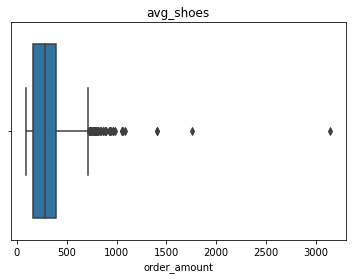

In [382]:
print(sns.boxplot(x = avg_shoes).set_title(blurb))

In [383]:
# Summary Statistics v3

# inputs
avg_shoes_dataset = df[df["order_amount"] < 25000]
blurb = "avg_shoes"
avg_shoes = avg_shoes_dataset["order_amount"]


data = avg_shoes
dataset = avg_shoes_dataset

# Reports
sumary_statistics(data, blurb)
report_percentages(blurb, dataset)

Summary Statistics Report for  avg_shoes 

sum avg_shoes      =  1496985.128
range avg_shoes    =  3055.1279999999997
variance avg_shoes =  27483.720564497053
stnd dev avg_shoes =  165.7821479065133
mean avg_shoes     =  303.1561620089105
median avg_shoes   =  284.0
mode avg_shoes     =  153.0


Precentage Report for avg_shoes

Dataset Shape =  (4938, 7)

% of sales              =  9.517487306347034

% of unique_order_id    =  98.74025194961008

% of unique_shop_id     =  99.00990099009901

% of unique customer id =  99.66887417218543

% of_all_items_sold     =  22.41442097596504

avg number items/order   =  1.9947336439133077

precent_is_cash         =  31.915755366545163

precent_is_not_cash     =  68.06399351964359

precent_of_all_cash     =  98.87076537013802

precent_of_all_not_cash =  98.67880211391662
